<a href="https://colab.research.google.com/github/KhmAsif/IMSE441Spring24/blob/main/Linear_Regression_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

#statistic
import scipy as scipy
from scipy import stats
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
#from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



# Data

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/KhmAsif/IMSE441Spring24/main/Oxygen%20purity.csv')
data.head(5)


,obs,hydrocarbon,purity
0,1,0.99,90.01
1,2,1.02,89.05
2,3,1.15,91.43
3,4,1.29,93.74
4,5,1.46,96.73


In [3]:
x = data[['hydrocarbon']]
y= data['purity']
x


,hydrocarbon
0,0.99
1,1.02
2,1.15
3,1.29
4,1.46
5,1.36
6,0.87
7,1.23
8,1.55
9,1.40


# Normality Check

In [4]:
%pip install pingouin
import pingouin as pg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 1.3 MB/s eta 0:00:00


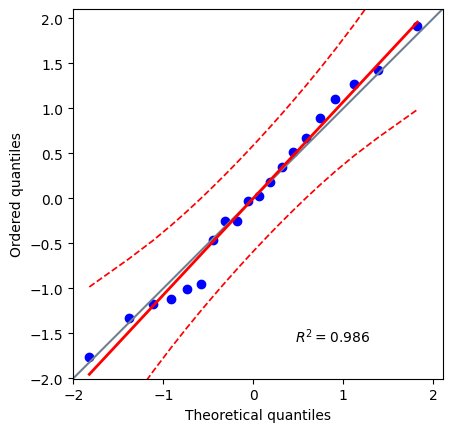

In [5]:
pg.qqplot(x)
plt.show()

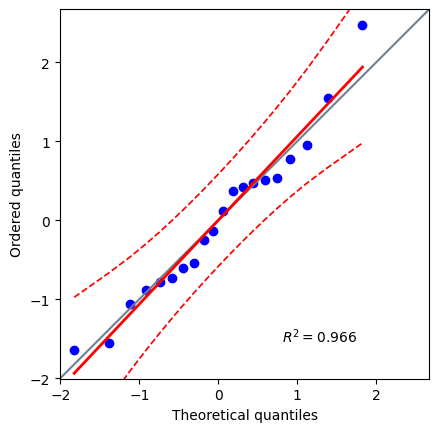

In [6]:
pg.qqplot(y)
plt.show()

# **Regression: Method 1**

In [7]:
model_1 = lm.LinearRegression()
model_1.fit(x,y)

LinearRegression()

In [8]:
print('Coefficients: ', model_1.coef_)
print("y-intercept ", model_1.intercept_)

Coefficients:  [14.94747973]
y-intercept  74.28331424039479


#**y= 74.283 + 14.947 *x**

In [9]:
y_pred = model_1.predict(x)
y_pred

array([89.08131918, 89.52974357, 91.47291593, 93.56556309, 96.10663465,
       94.61188668, 87.28762161, 92.66871431, 97.45190783, 95.20978587,
       92.07081512, 91.47291593, 88.93184438, 89.38026877, 90.87501674,
       92.22028992, 93.1171387 , 94.01398749, 95.65821026, 88.48341999])

In [10]:
print("mean square error: ", mean_squared_error(y,y_pred))

mean square error:  1.0624908437610157


In [11]:
r_sq = model_1.score(x, y)
r_sq

0.8774357051715553

# **Regression: Method 2**

In [12]:
import statsmodels.api as sm

In [13]:
x = sm.add_constant(x)
model_2 = sm.OLS(y, x).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 purity   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     128.9
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           1.23e-09
Time:                        18:21:36   Log-Likelihood:                -28.985
No. Observations:                  20   AIC:                             61.97
Df Residuals:                      18   BIC:                             63.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          74.2833      1.593     46.617      

# **Residual analysis**

In [14]:
residual = y - y_pred
residual

0     0.928681
1    -0.479744
2    -0.042916
3     0.174437
4     0.623365
5    -0.161887
6     0.302378
7    -0.898714
8     1.968092
9    -1.559786
10    1.469185
11    1.047084
12    1.628156
13    0.159731
14   -1.025017
15   -1.830290
16    0.132861
17   -0.603987
18   -0.678210
19   -1.153420
Name: purity, dtype: float64

In [15]:
res_squared = residual*residual
sse= res_squared.sum()
sse

21.24981687522031

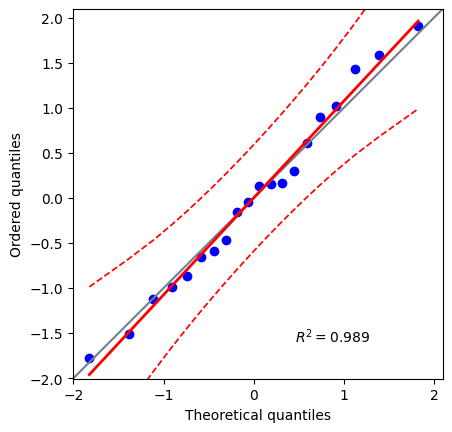

In [16]:
pg.qqplot(residual)
plt.show()

# **Scatterplot: Model Validation**

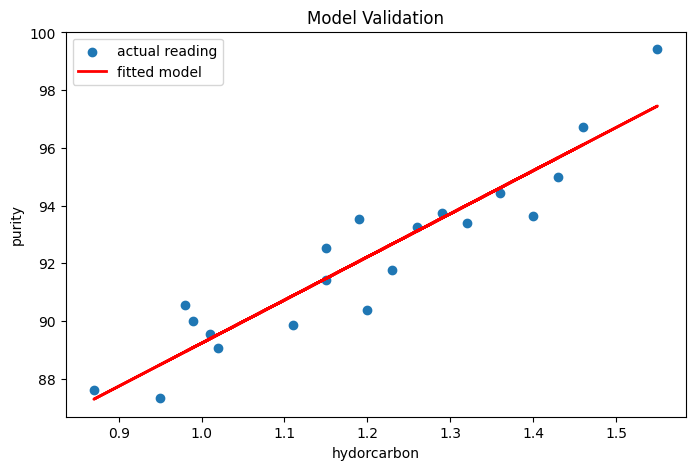

In [17]:
plt.figure(figsize=(8,5))
plt.scatter(x['hydrocarbon'],y)
plt.plot(x['hydrocarbon'], y_pred, linewidth=2, color='red')
plt.xlabel('hydorcarbon')
plt.ylabel('purity')
plt.legend(['actual reading', 'fitted model'])
plt.title('Model Validation')
plt.show()

# **Multiple Linear Regression**

In [18]:
data2=pd.read_csv('https://raw.githubusercontent.com/KhmAsif/IMSE441Spring24/main/Coffee.csv')
data2

,Product,Product_Type,Type,Inventory,Sales,Marketing,Profit
0,Amaretto,Coffee,Regular,777,219,24,94
1,Colombian,Coffee,Regular,623,190,27,68
2,Decaf Irish Cream,Coffee,Decaf,821,234,26,101
3,Green Tea,Tea,Regular,623,100,14,30
4,Caffe Mocha,Espresso,Regular,456,134,15,54
5,Decaf Espresso,Espresso,Decaf,558,180,23,53
6,Chamomile,Herbal Tea,Decaf,1091,341,47,99
7,Lemon,Herbal Tea,Decaf,435,150,57,0
8,Mint,Herbal Tea,Decaf,336,140,19,33
9,Darjeeling,Tea,Regular,338,130,22,17


In [ ]:
x1 = data2[['Inventory'],['Ma']
y1= data['purity']